# 도표 보고 발표하기 시험 유형 만들기

도표 보고 발표하기 시험도 마찬가지로 시험을 위한 준비

- 도표 준비하기

In [1]:
import pandas as pd
from openai import OpenAI
from IPython.display import Image

client = OpenAI()

## create_desc 함수 만들기

In [2]:
import base64

In [3]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [4]:
def create_desc(img_path):
    base64_image = encode_image(img_path)
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            {
              "role": "user",
              "content": [
                {"type": "text", "text": "Extract all available information from given image."},
                {
                  "type": "image_url",
                  "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                  },
                },
              ],
            }
            ],
            max_tokens=1000
        )
    text = response.choices[0].message.content
    return text

In [5]:
!ls ./charts

forein_students_in_english_speaking_countries.png
social_media_pofile.png
tautgh_at_school.jpg


In [6]:
img_path = "./charts/forein_students_in_english_speaking_countries.png"

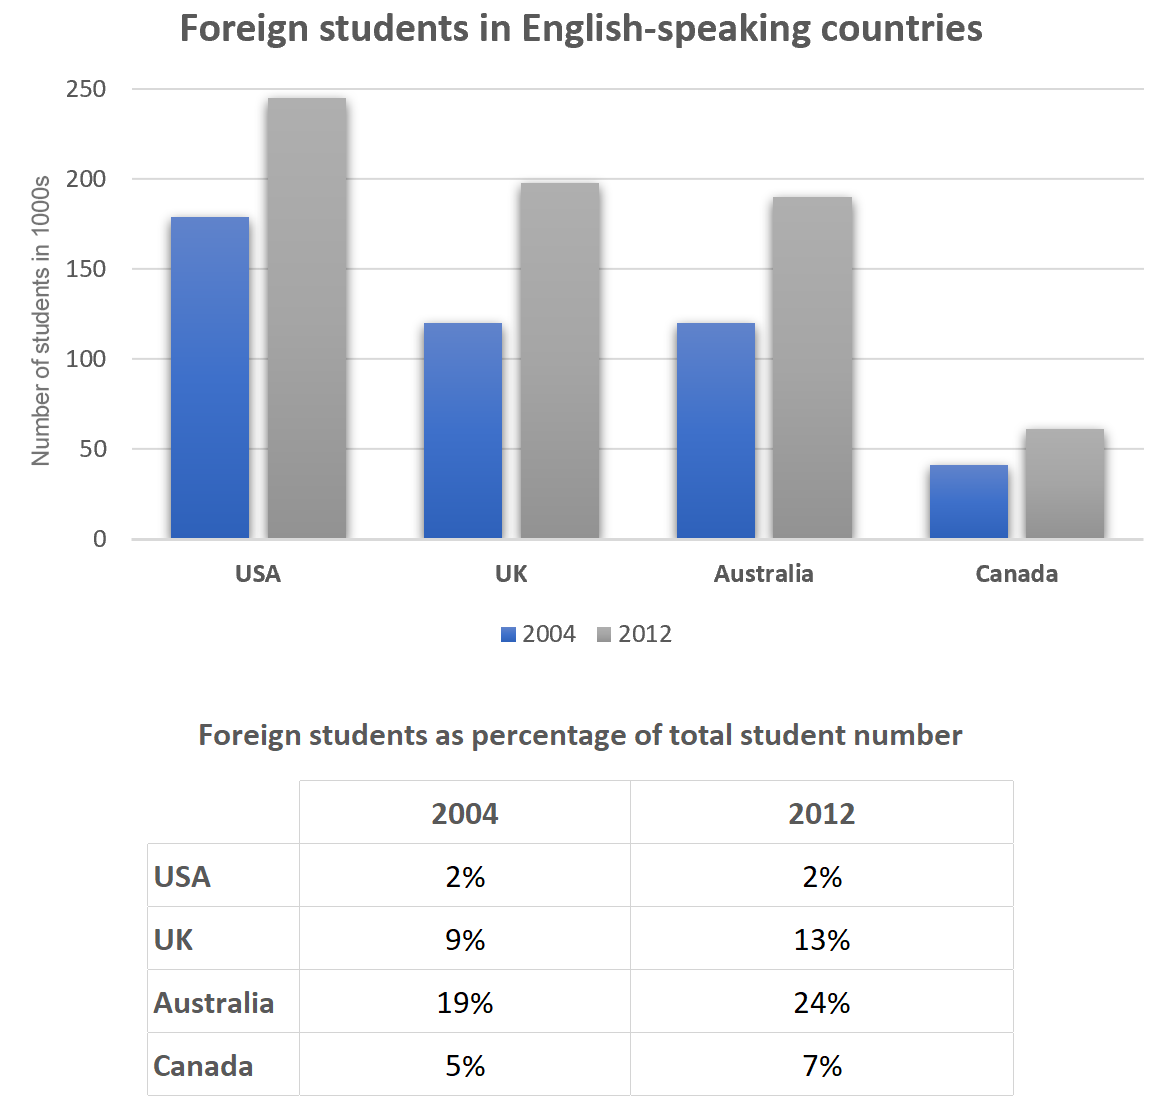

In [7]:
Image(img_path, width=480)

In [8]:
create_desc(img_path=img_path)

'The image presents a bar graph and a table related to the topic "Foreign students in English-speaking countries."\n\nFrom the bar graph, we can discern the following:\n- It shows the number of foreign students (in 1000s) in four English-speaking countries: the USA, the UK, Australia, and Canada.\n- There are two bars for each country, representing two different years: 2004 (blue bar) and 2012 (grey bar).\n- The USA had approximately 150,000 foreign students in 2004 and just over 200,000 in 2012.\n- The UK had around 100,000 foreign students in 2004 and close to 200,000 in 2012.\n- Australia had slightly less than 100,000 foreign students in 2004, increasing to around 200,000 in 2012.\n- Canada had the fewest foreign students, with roughly 25,000 in 2004 and approaching 100,000 in 2012.\n\nThe table provides additional information:\n- It lists the percentage of foreign students as a part of the total student population for the same countries and years as the bar graph.\n- In the USA, t

## 이미지 모두 불러오기

In [9]:
from glob import glob

In [10]:
img_list = glob("./charts/*.jpg") + glob("./charts/*.png")

In [11]:
img_list

['./charts/tautgh_at_school.jpg',
 './charts/social_media_pofile.png',
 './charts/forein_students_in_english_speaking_countries.png']

In [12]:
record_list = []

for i, img_path in enumerate(img_list):
    desc = create_desc(img_path)
    record = {"img_path": img_path, "desc": desc}
    print(record)

    record_list.append(record)

{'img_path': './charts/tautgh_at_school.jpg', 'desc': 'The image is a pie chart that represents survey data responding to the question: "Which language should children whose first language is NOT English, be taught at school?" The chart is broken down into several colored sections, each corresponding to a language option, along with the percentage of respondents who selected that option. Here\'s the breakdown:\n\n- English: 61.9%\n- Not sure: 12.7%\n- Spanish: 8.9%\n- French: 6.5%\n- Mandarin: 3.4%\n- Other (please specify): 2.0%\n- Arabic: 1.0%\n\nThe largest portion of the pie chart is red, indicating that the majority of respondents (61.9%) think that English should be taught to children whose first language is not English. The "Not sure" option, shown in light grey, has the second-largest segment. The other options have smaller portions of the pie chart, with Arabic having the smallest at 1.0%.'}
{'img_path': './charts/social_media_pofile.png', 'desc': 'The image shows a bar chart 

In [13]:
!mkdir -p ./data/speaking__describe_charts

In [14]:
save_dir = "./data/speaking__describe_charts"

In [15]:
df = pd.DataFrame(record_list)
df

,img_path,desc
0,./charts/tautgh_at_school.jpg,The image is a pie chart that represents surve...
1,./charts/social_media_pofile.png,"The image shows a bar chart titled ""Social Med..."
2,./charts/forein_students_in_english_speaking_c...,The image is a chart and table combo that pres...


In [16]:
df.to_csv(f"{save_dir}/desc_charts.csv", index=False)

## 평가하기

In [17]:
from langchain_openai import ChatOpenAI
from typing import Union
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

In [18]:
model = ChatOpenAI(model="gpt-4-1106-preview", temperature=0.8) # CoT 는 다양한 샘플을 만들어야하기 때문에 temperature를 올려야함

In [19]:
class Evaluation(BaseModel):
    score: int = Field(description="도표 보고 발표하기 점수. 0~10점")
    feedback: str = Field(description="도표 보고 발표하기를 더 잘 할 수 있는 자세한 피드백. Markdown형식, 한국어로.")

In [20]:
parser = JsonOutputParser(pydantic_object=Evaluation)
format_instructions = parser.get_format_instructions()
format_instructions

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"score": {"title": "Score", "description": "\\ub3c4\\ud45c \\ubcf4\\uace0 \\ubc1c\\ud45c\\ud558\\uae30 \\uc810\\uc218. 0~10\\uc810", "type": "integer"}, "feedback": {"title": "Feedback", "description": "\\ub3c4\\ud45c \\ubcf4\\uace0 \\ubc1c\\ud45c\\ud558\\uae30\\ub97c \\ub354 \\uc798 \\ud560 \\uc218 \\uc788\\ub294 \\uc790\\uc138\\ud55c \\ud53c\\ub4dc\\ubc31. Markdown\\ud615\\uc2dd, \\ud55c\\uad6d\\uc5b4\\ub85c.", "type": "string"}}, "required": ["score", "feedback"]}\n```'

In [21]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate

human_prompt_template = HumanMessagePromptTemplate.from_template(
                            "도표보고 발표하기 영어 시험이다. 사용자의 응답을 Reference와 비교하여 평가하라.\n사용자: {input}\Reference: {ref}\n{format_instructions}",
                            partial_variables={"format_instructions": format_instructions})

prompt = ChatPromptTemplate.from_messages(
    [
        human_prompt_template,
    ])

In [22]:
eval_chain = prompt | model | parser

In [23]:
sample = df.iloc[0]

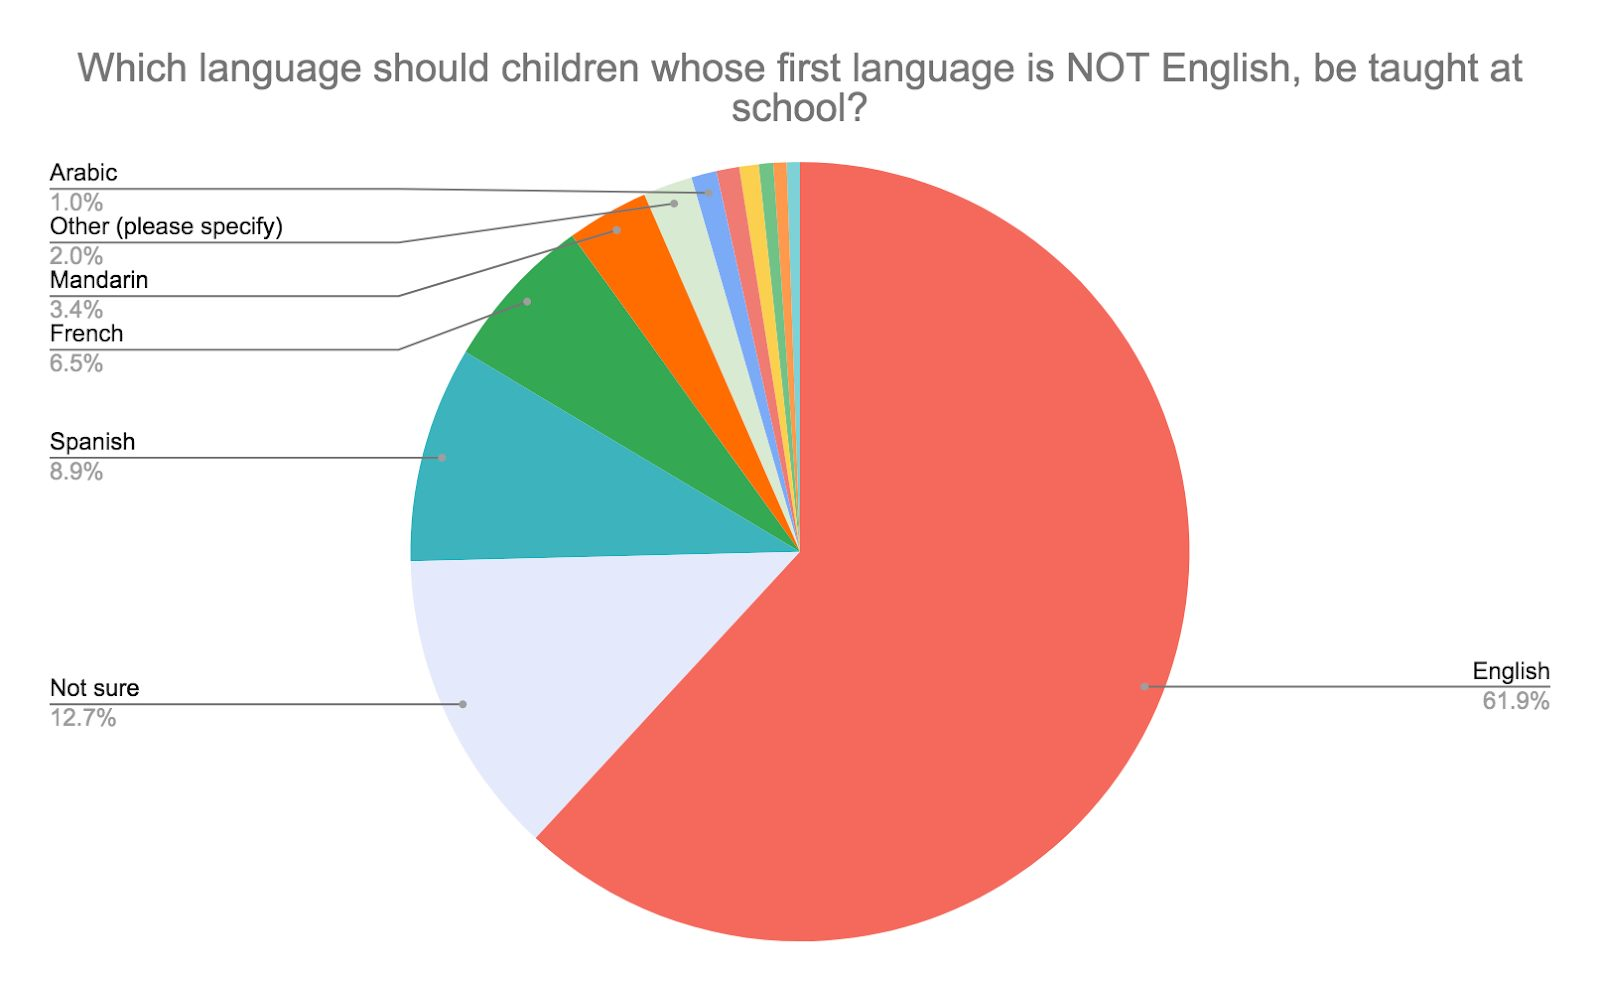

In [24]:
Image(sample['img_path'], width=480)

In [25]:
sample['desc']

'The image is a pie chart that represents survey data responding to the question: "Which language should children whose first language is NOT English, be taught at school?" The chart is broken down into several colored sections, each corresponding to a language option, along with the percentage of respondents who selected that option. Here\'s the breakdown:\n\n- English: 61.9%\n- Not sure: 12.7%\n- Spanish: 8.9%\n- French: 6.5%\n- Mandarin: 3.4%\n- Other (please specify): 2.0%\n- Arabic: 1.0%\n\nThe largest portion of the pie chart is red, indicating that the majority of respondents (61.9%) think that English should be taught to children whose first language is not English. The "Not sure" option, shown in light grey, has the second-largest segment. The other options have smaller portions of the pie chart, with Arabic having the smallest at 1.0%.'

In [26]:
result = eval_chain.invoke({"input": "this is a pie chart",
                            "ref": sample['desc']})

In [27]:
result

{'score': 3,
 'feedback': "사용자의 응답은 도표의 종류를 올바르게 언급하였으나, 도표의 세부 내용과 각 언어 옵션에 대한 응답자의 비율을 설명하지 않았습니다. 발표에서는 도표의 각 부분이 나타내는 정보를 구체적으로 설명하여 청중이 데이터를 명확하게 이해할 수 있도록 해야 합니다. 예를 들어, '가장 큰 부분은 영어로, 응답자의 61.9%가 영어를 가르쳐야 한다고 생각한다'와 같이 말하는 것이 좋습니다. 또한, '모르겠음', '스페인어', '프랑스어', '만다린', '기타', '아랍어'에 대한 비율도 언급하여 전체적인 설문 결과의 흐름을 설명할 필요가 있습니다."}